# HW1

## 1 Data Loading

In [2]:
import numpy as np
import scipy.io as sio

# load data
mnist_data = sio.loadmat('data/mnist_data.mat')
mnist_training_data = mnist_data['training_data']
mnist_training_labels= mnist_data['training_labels']

spam_data = sio.loadmat('data/spam_data.mat')
spam_training_data = spam_data['training_data']
spam_training_labels= spam_data['training_labels']

cifar10_data = sio.loadmat('data/cifar10_data.mat')
cifar10_training_data = cifar10_data['training_data']
cifar10_training_labels= cifar10_data['training_labels']

print('LOAD SUCCESS!')

LOAD SUCCESS!


## 2 Data Partitioning

Rarely will you receive “training” data and “validation” data; usually you will have to partition available labeled data yourself. The datasets for this assignment are described below. Write code to partition the datasets as follows.

(a)	For the MNIST dataset, write code that sets aside 10,000 training images as a validation set.

(b)	For the spam dataset, write code that sets aside 20% of the training data as a validation set.

(c)	For the CIFAR-10 dataset, write code that sets aside 5,000 training images as a validation set. 

Be sure to **shuﬄe your data** before splitting it to make sure all the classes are represented in your partitions. Note: Make sure that you shuﬄe the labels with the training images. It’s a very common error to mislabel the training images by forgetting to permute the labels with the images!

In [3]:
# shuffle data
def shuffle_data_and_labels(data, labels):
    indices = np.arange(data.shape[0])
    print("before:" + str(indices))
    np.random.shuffle(indices)
    print("after:" + str(indices))
    return [data[indices], labels[indices]]
    
mnist_shuffled = shuffle_data_and_labels(mnist_training_data, mnist_training_labels)
mnist_training_data = mnist_shuffled[0]
mnist_training_labels = mnist_shuffled[1]
spam_shuffled = shuffle_data_and_labels(spam_training_data, spam_training_labels)
spam_training_data = spam_shuffled[0]
spam_training_labels = spam_shuffled[1]
cifar10_shuffled = shuffle_data_and_labels(cifar10_training_data, cifar10_training_labels)
cifar10_training_data = cifar10_shuffled[0]
cifar10_training_labels = cifar10_shuffled[1]

# partition data
mnist_training_data_len = mnist_training_data.shape[0]
mnist_training_set_data = mnist_training_data[10000:,:]
mnist_training_set_labels = mnist_training_labels[10000:,0]
mnist_validation_set_data = mnist_training_data[:10000,:]
mnist_validation_set_labels = mnist_training_labels[:10000,0]

spam_training_data_len = spam_training_data.shape[0]
spam_training_set_data = spam_training_data[:int(0.8*spam_training_data_len),:]
spam_training_set_labels = spam_training_labels[:int(0.8*spam_training_data_len),0]
spam_validation_set_data = spam_training_data[int(0.8*spam_training_data_len):,:]
spam_validation_set_labels = spam_training_labels[int(0.8*spam_training_data_len):,0]

cifar10_training_data_len = cifar10_training_data.shape[0]
cifar10_training_set_data = cifar10_training_data[5000:,:]
cifar10_training_set_labels = cifar10_training_labels[5000:,0]
cifar10_validation_set_data = cifar10_training_data[:5000:,:]
cifar10_validation_set_labels = cifar10_training_labels[:5000:,0]

print('SHUFFLE SUCCESS!')

before:[    0     1     2 ... 59997 59998 59999]
after:[50950 12066  9588 ... 40542 43561 51887]
before:[   0    1    2 ... 5169 5170 5171]
after:[3507 1138  368 ... 4041 1197 2617]
before:[    0     1     2 ... 49997 49998 49999]
after:[35032  2585 37717 ... 42083 16439 22157]
SHUFFLE SUCCESS!


## 3 Support Vector Machine: Coding
We will use linear Support Vector Machines to classify our datasets. For images, we will use the simplest of features for classification: raw pixel brightness values. In other words, our feature vector for an image will be a row vector with all the pixel values concatenated in a row major (or column major) order.

There are several ways to evaluate models. We will use classification accuracy as a measure of the error rate (see here: https://scikit-learn.org/stable/modules/generated/sklearn. metrics.accuracy_score.html).
Train a linear Support Vector Machine (SVM) on all three datasets. Plot the error rate on the training and validation sets versus the number of training examples that you used to train your classifier. The number of training examples in your experiment will vary per dataset.

You may only use sklearn for the SVM model and the accuracy metric function. Everything else (generating plots) must be done without the use of sklearn.

(a)	For the MNIST dataset, use raw pixels as features. Train your model with the following numbers of training examples: 100, 200, 500, 1,000, 2,000, 5,000, 10,000. At this stage, you should expect accuracies between 70% and 90%.

Hint: Be consistent with any preprocessing you do. Use either integer values between 0 and 255 or floating-point values between 0 and 1. Training on floats and then testing with integers is bound to cause trouble.

(b)	For the spam dataset, use the provided word frequencies as features. In other words, each document is represented by a vector, where the ith entry denotes the number of times word i (as specified in featurize.py) is found in that document. Train your model with the following numbers of training examples: 100, 200, 500, 1,000, 2,000, ALL.

Note that this dataset does not have 10,000 examples; use all of your examples instead of 10,000. At this stage, you should expect accuracies between 70% and 90%.

(c) For the CIFAR-10 dataset, use raw pixels as features. At this stage, you should expect accura-cies between 25% and 35%. Be forewarned that training SVMs for CIFAR-10 takes a couple minutes to run for a large training set locally. Train your model with the following numbers of training examples: 100, 200, 500, 1,000, 2,000, 5,000.

Note: We find that SVC(kernel=’linear’) is faster than LinearSVC.

In [4]:
from sklearn import svm
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# training
def train(training_number_list, training_set_data, training_set_labels, kernel="linear", C=1.0):
    clf_list = []
    for num in training_number_list:
        clf = SVC(kernel=kernel, C=C, max_iter=1000000)
        clf.fit(training_set_data[:num, :], training_set_labels[:num])
        print(num)
        clf_list.append(clf)
    return clf_list

# predict and calculate accuracy
def calc_accuracy(clf, data, labels):
    accuracy = clf.score(data, labels)
    print(accuracy)
    return accuracy

In [10]:
# training
mnist_training_number_list = [100, 200, 500, 1000, 2000, 5000, 10000]
mnist_clf_list = train(mnist_training_number_list, mnist_training_set_data, mnist_training_set_labels)
print('TRAIN SUCCESS!')

100
200
500
1000
2000
5000
10000
TRAIN SUCCESS!


1.0
0.7537
1.0
0.8142
1.0
0.8568
1.0
0.8875
1.0
0.9
1.0
0.9065
1.0
0.9134
PLOT SUCCESS!


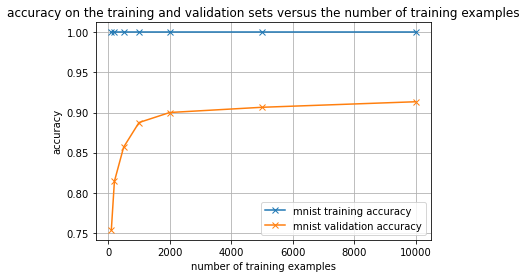

In [11]:
# predict and plot
mnist_training_accuracy_list = []
mnist_validation_accuracy_list = []
for i in range(0, len(mnist_training_number_list)):
    num = mnist_training_number_list[i]
    clf = mnist_clf_list[i]
    mnist_training_accuracy_list.append(calc_accuracy(clf, mnist_training_set_data[:num,:], mnist_training_set_labels[:num]))
    mnist_validation_accuracy_list.append(calc_accuracy(clf, mnist_validation_set_data, mnist_validation_set_labels))

# plot
plt.plot(mnist_training_number_list, mnist_training_accuracy_list, label='mnist training accuracy', marker="x")
plt.plot(mnist_training_number_list, mnist_validation_accuracy_list, label='mnist validation accuracy', marker="x")
plt.xlabel('number of training examples')
plt.ylabel('accuracy')
plt.title("accuracy on the training and validation sets versus the number of training examples")
plt.grid(True)
plt.legend()

print('PLOT SUCCESS!')

In [12]:
# training
spam_training_number_list = [100, 200, 500, 1000, 2000, spam_training_set_data.shape[0]]
spam_clf_list = train(spam_training_number_list, spam_training_set_data, spam_training_set_labels)
print('TRAIN SUCCESS!')

100
200
500
1000
2000
4137
TRAIN SUCCESS!


0.88
0.7874396135265701
0.79
0.7980676328502415
0.804
0.8067632850241546
0.794
0.8164251207729468
0.8075
0.8135265700483092
0.8003384094754653
0.8115942028985508
PLOT SUCCESS!


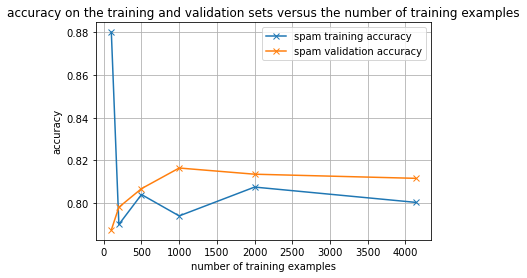

In [13]:
# predict and plot
spam_training_accuracy_list = []
spam_validation_accuracy_list = []
for i in range(0, len(spam_training_number_list)):
    num = spam_training_number_list[i]
    clf = spam_clf_list[i]
    spam_training_accuracy_list.append(calc_accuracy(clf, spam_training_set_data[:num,:], spam_training_set_labels[:num]))
    spam_validation_accuracy_list.append(calc_accuracy(clf, spam_validation_set_data, spam_validation_set_labels))

# plot
plt.plot(spam_training_number_list, spam_training_accuracy_list, label='spam training accuracy', marker="x")
plt.plot(spam_training_number_list, spam_validation_accuracy_list, label='spam validation accuracy', marker="x")
plt.xlabel('number of training examples')
plt.ylabel('accuracy')
plt.title("accuracy on the training and validation sets versus the number of training examples")
plt.grid(True)
plt.legend()

print('PLOT SUCCESS!')

In [14]:
# training
cifar10_training_number_list = [100, 200, 500, 1000, 2000, 5000]
cifar10_clf_list = train(cifar10_training_number_list, cifar10_training_set_data, cifar10_training_set_labels)
print('TRAIN SUCCESS!')

100
200
500
1000
2000
5000
TRAIN SUCCESS!


1.0
0.2414
1.0
0.261
1.0
0.2962
1.0
0.3038
1.0
0.2958
1.0
0.2908
PLOT SUCCESS!


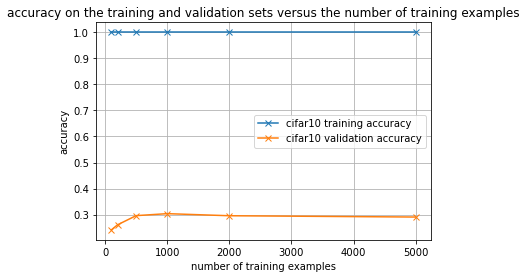

In [15]:
# predict and plot
cifar10_training_accuracy_list = []
cifar10_validation_accuracy_list = []
for i in range(0, len(cifar10_training_number_list)):
    num = cifar10_training_number_list[i]
    clf = cifar10_clf_list[i]
    cifar10_training_accuracy_list.append(calc_accuracy(clf, cifar10_training_set_data[:num,:], cifar10_training_set_labels[:num]))
    cifar10_validation_accuracy_list.append(calc_accuracy(clf, cifar10_validation_set_data, cifar10_validation_set_labels))

# plot
plt.plot(cifar10_training_number_list, cifar10_training_accuracy_list, label='cifar10 training accuracy', marker="x")
plt.plot(cifar10_training_number_list, cifar10_validation_accuracy_list, label='cifar10 validation accuracy', marker="x")
plt.xlabel('number of training examples')
plt.ylabel('accuracy')
plt.title("accuracy on the training and validation sets versus the number of training examples")
plt.grid(True)
plt.legend()

print('PLOT SUCCESS!')

# 4 Hyperparameter Tuning
In the previous problem, you learned parameters for a model that classifies the data. Many classifiers also have hyperparameters that you can tune to influence the parameters. In this problem,we’ll determine good values for the regularization parameter C in the soft-margin SVM algorithm.

When we are trying to choose a hyperparameter value, we train the model repeatedly with different
hyperparameters. We select the hyperparameter that gives the model with the highest accuracy on
the validation dataset. Before generating predictions for the test set, the model should be retrained
using all the labeled data (including the validation data) and the previously-determined hyperparameter.

The use of automatic hyperparameter optimization libraries is prohibited for this part of the
homework.

(a) For the MNIST dataset, find the best C value. In your report, list at least 8 C values you
tried, the corresponding accuracies, and the best C value. As in the previous problem, for
performance reasons, you are required to train with up to 10,000 training examples but not
required to train with more than that

In [16]:
# try different Cs, 10000 trainning examples
# mnist_c_list = [i for i in range(10000000, 10000001)]
mnist_c_list = [1e-07,2.5e-07, 5e-07, 7.5e-07, 1e-06,2.5e-06, 5e-06, 7.5e-06, 1e-05]
mnist_clf_c_list = []
for mnist_c in mnist_c_list:
    mnist_clf= SVC(kernel='linear', C=mnist_c, max_iter=100000)
    mnist_clf.fit(mnist_training_set_data[:10000,:], mnist_training_set_labels[:10000])
    mnist_clf_c_list.append(mnist_clf)
    print("TRAIN SUCCESS: C=" + str(mnist_c))

TRAIN SUCCESS: C=1e-07
TRAIN SUCCESS: C=2.5e-07
TRAIN SUCCESS: C=5e-07
TRAIN SUCCESS: C=7.5e-07
TRAIN SUCCESS: C=1e-06
TRAIN SUCCESS: C=2.5e-06
TRAIN SUCCESS: C=5e-06
TRAIN SUCCESS: C=7.5e-06
TRAIN SUCCESS: C=1e-05


PREDICT SUCCESS: SVC(C=1e-07, kernel='linear', max_iter=100000): 0.9242
PREDICT SUCCESS: SVC(C=2.5e-07, kernel='linear', max_iter=100000): 0.9309
PREDICT SUCCESS: SVC(C=5e-07, kernel='linear', max_iter=100000): 0.9321
PREDICT SUCCESS: SVC(C=7.5e-07, kernel='linear', max_iter=100000): 0.9313
PREDICT SUCCESS: SVC(C=1e-06, kernel='linear', max_iter=100000): 0.9311
PREDICT SUCCESS: SVC(C=2.5e-06, kernel='linear', max_iter=100000): 0.9262
PREDICT SUCCESS: SVC(C=5e-06, kernel='linear', max_iter=100000): 0.9237
PREDICT SUCCESS: SVC(C=7.5e-06, kernel='linear', max_iter=100000): 0.919
PREDICT SUCCESS: SVC(C=1e-05, kernel='linear', max_iter=100000): 0.917
best_c5e-07
best_validation_accuracy:0.9321
PLOT SUCCESS!


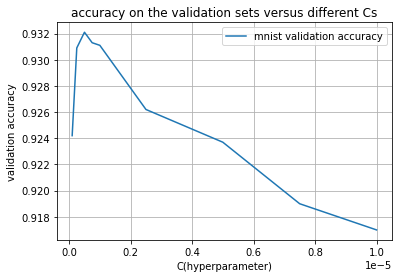

In [17]:
# find highest accuracy on validation sets
best_c = 0
best_validation_accuracy = 0
mnist_clf_validation_accuracy_list = []
for i in range(0, len(mnist_clf_c_list)):
    mnist_clf_validation_accuracy = mnist_clf_c_list[i].score(mnist_validation_set_data, mnist_validation_set_labels)
    mnist_clf_validation_accuracy_list.append(mnist_clf_validation_accuracy)
    if mnist_clf_validation_accuracy > best_validation_accuracy:
        best_c = mnist_c_list[i]
        best_validation_accuracy = mnist_clf_validation_accuracy
    print("PREDICT SUCCESS: " + str(mnist_c_list[i]) + ": " + str(mnist_clf_validation_accuracy))
print("best_c:" + str(best_c))
print("best_validation_accuracy:" + str(best_validation_accuracy))
    
# plot
plt.plot(mnist_c_list, mnist_clf_validation_accuracy_list, label='mnist validation accuracy')

plt.xlabel('C(hyperparameter)')
plt.ylabel('validation accuracy')
plt.title("accuracy on the validation sets versus different Cs")
plt.grid(True)
plt.legend()

print('PLOT SUCCESS!')

# 5 K-Fold Cross-Validation

For smaller datasets (e.g., the spam dataset), the validation set contains fewer examples, and our estimate of our error might not be accurate—the estimate has high variance. A way to combat this is to use k-fold cross-validation.

In k-fold cross-validation, the training data is shuﬄed and partitioned into k disjoint sets. Then the model is trained on k − 1 sets and validated on the kth set. This process is repeated k times with each set chosen as the validation set once. The cross-validation accuracy we report is the accuracy averaged over the k iterations.
Use of automatic cross-validation libraries is prohibited for this part of the homework.

(a) For the spam dataset, use 5-fold cross-validation to find and report the best C value. In your report, list at least 8 C values you tried, the corresponding accuracies, and the best C value.

Hint: Eﬀective cross-validation requires choosing from random partitions. This is best imple-mented by randomly shuﬄing your training examples and labels, then partitioning them by their indices.

1:0.8063768115942029
15:0.8065700483091787
30:0.8065700483091789


c:\users\jsjhf\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
c:\users\jsjhf\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
c:\users\jsjhf\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
c:\users\jsjhf\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver

best_c:30
best_cross_validation_accuracy:0.8065700483091789
PLOT SUCCESS!


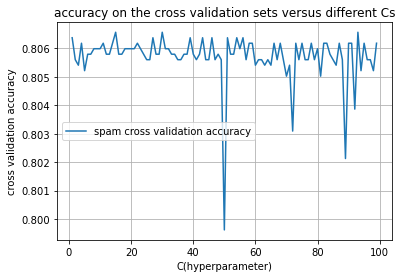

In [25]:
def get_indices_of_ith_partition(size, i, k):
    indices = []
    partition_size = size / k
    idx = partition_size * i
    while idx < min(size, idx+partition_size):
        indices.append(int(idx))
        idx += 1
    return np.array(indices)
    
    
k = 5
spam_c_list = list(range(1, 100))
best_cross_validation_accuracy = 0
best_c = 0
spam_clf_cross_validation_accuracy_list = []
for spam_c in spam_c_list:
    sum_accuracy = 0
    for i in range(0, k):
        spam_clf= SVC(kernel='linear', C=spam_c, max_iter=10000000)
        spam_training_set_data_partition = spam_training_set_data[get_indices_of_ith_partition(spam_training_set_data.shape[0], i, k)]
        spam_training_set_labels_partition = spam_training_set_labels[get_indices_of_ith_partition(spam_training_set_labels.shape[0], i, k)]
        spam_clf.fit(spam_training_set_data_partition, spam_training_set_labels_partition)
        sum_accuracy += spam_clf.score(spam_validation_set_data, spam_validation_set_labels)
    avg_accuracy = sum_accuracy / float(k)
    spam_clf_cross_validation_accuracy_list.append(avg_accuracy)
    if best_cross_validation_accuracy < avg_accuracy:
        best_cross_validation_accuracy = avg_accuracy
        best_c = spam_c
        print(str(spam_c) + ":" + str(avg_accuracy))
        
print("best_c:" + str(best_c))
print("best_cross_validation_accuracy:" + str(best_cross_validation_accuracy))

# plot
plt.plot(spam_c_list, spam_clf_cross_validation_accuracy_list, label='spam cross validation accuracy')

plt.xlabel('C(hyperparameter)')
plt.ylabel('cross validation accuracy')
plt.title("accuracy on the cross validation sets versus different Cs")
plt.grid(True)
plt.legend()

print('PLOT SUCCESS!')
    


# 6 Kaggle

• MNIST Competition: https://www.kaggle.com/t/38eaa18e7d154cae8b8957a4d39b1ac3 

• SPAM Competition: https://www.kaggle.com/t/76ac7336b3d04cdabefda13299102cc6

• CIFAR-10 Competition: https://www.kaggle.com/t/475825f6a31740f8bece23c85db57693

Using the best model you trained for each dataset, generate predictions for the test sets we provide and save those predictions to .csv files. Be sure to use integer labels (not floating-point!) and no spaces (not even after the commas). Upload your predictions to the Kaggle leaderboards (sub-mission instructions are provided within each Kaggle competition). In your report, include your Kaggle name as it displays on the leaderboard and your Kaggle score for each of the three datasets.

For your Kaggle submissions, you may optionally add more features or use a non-linear SVM kernel to get a higher position on the leaderboard. If you do, please explain what you did in your report and cite your external sources. Examples of things you might investigate include SIFT and HOG features for images, and bag of words for spam/ham. Almost everything is fair game as long as your underlying model is an SVM (i.e., do not use a neural network, decision tree, etc.). You are also not allowed to search for the labeled test data and submit that to Kaggle. If you have any questions about whether something is allowed or not, ask on Piazza.

Remember to start early! Kaggle only permits two submissions per leaderboard per day. To help you format the submission, please use check.py to run a basic sanity check on your submission and save csv.py to help save your results.
To check your submission csv,

```bash
python check.py <competition name, eg. mnist> <submission csv file>
```

HOG: Histogram of Oriented Gradients

SIFT: Scale Invariant Feature Transform

SURF: Speeded-Up Robust Feature